In [89]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
mpl.rcParams['figure.dpi'] = 400

In [90]:
df = pd.read_csv('CaseStudyFile/Chapter_1_cleaned_data.csv')

In [91]:
from numpy.random import default_rng

In [92]:
rg = default_rng(4)

In [146]:
X_1_pos = rg.uniform(low = 1, high = 7, size = (20,1))
X_1_neg = rg.uniform(low = 3, high = 10, size = (20, 1))
X_2_pos = rg.uniform(low = 1, high = 7, size =(20, 1))
X_2_neg = rg.uniform(low = 3, high = 10, size = (20, 1))
print(X_1_pos[0:3])
print(X_1_neg[0:3])
print(X_2_pos[0:3])
print(X_2_neg[0:3])

[[1.36444539]
 [2.58275035]
 [1.13382431]]
[[9.32988713]
 [5.23313619]
 [8.32683834]]
[[4.0725691 ]
 [1.7600652 ]
 [6.70977681]]
[[9.25134172]
 [9.659196  ]
 [9.97666995]]


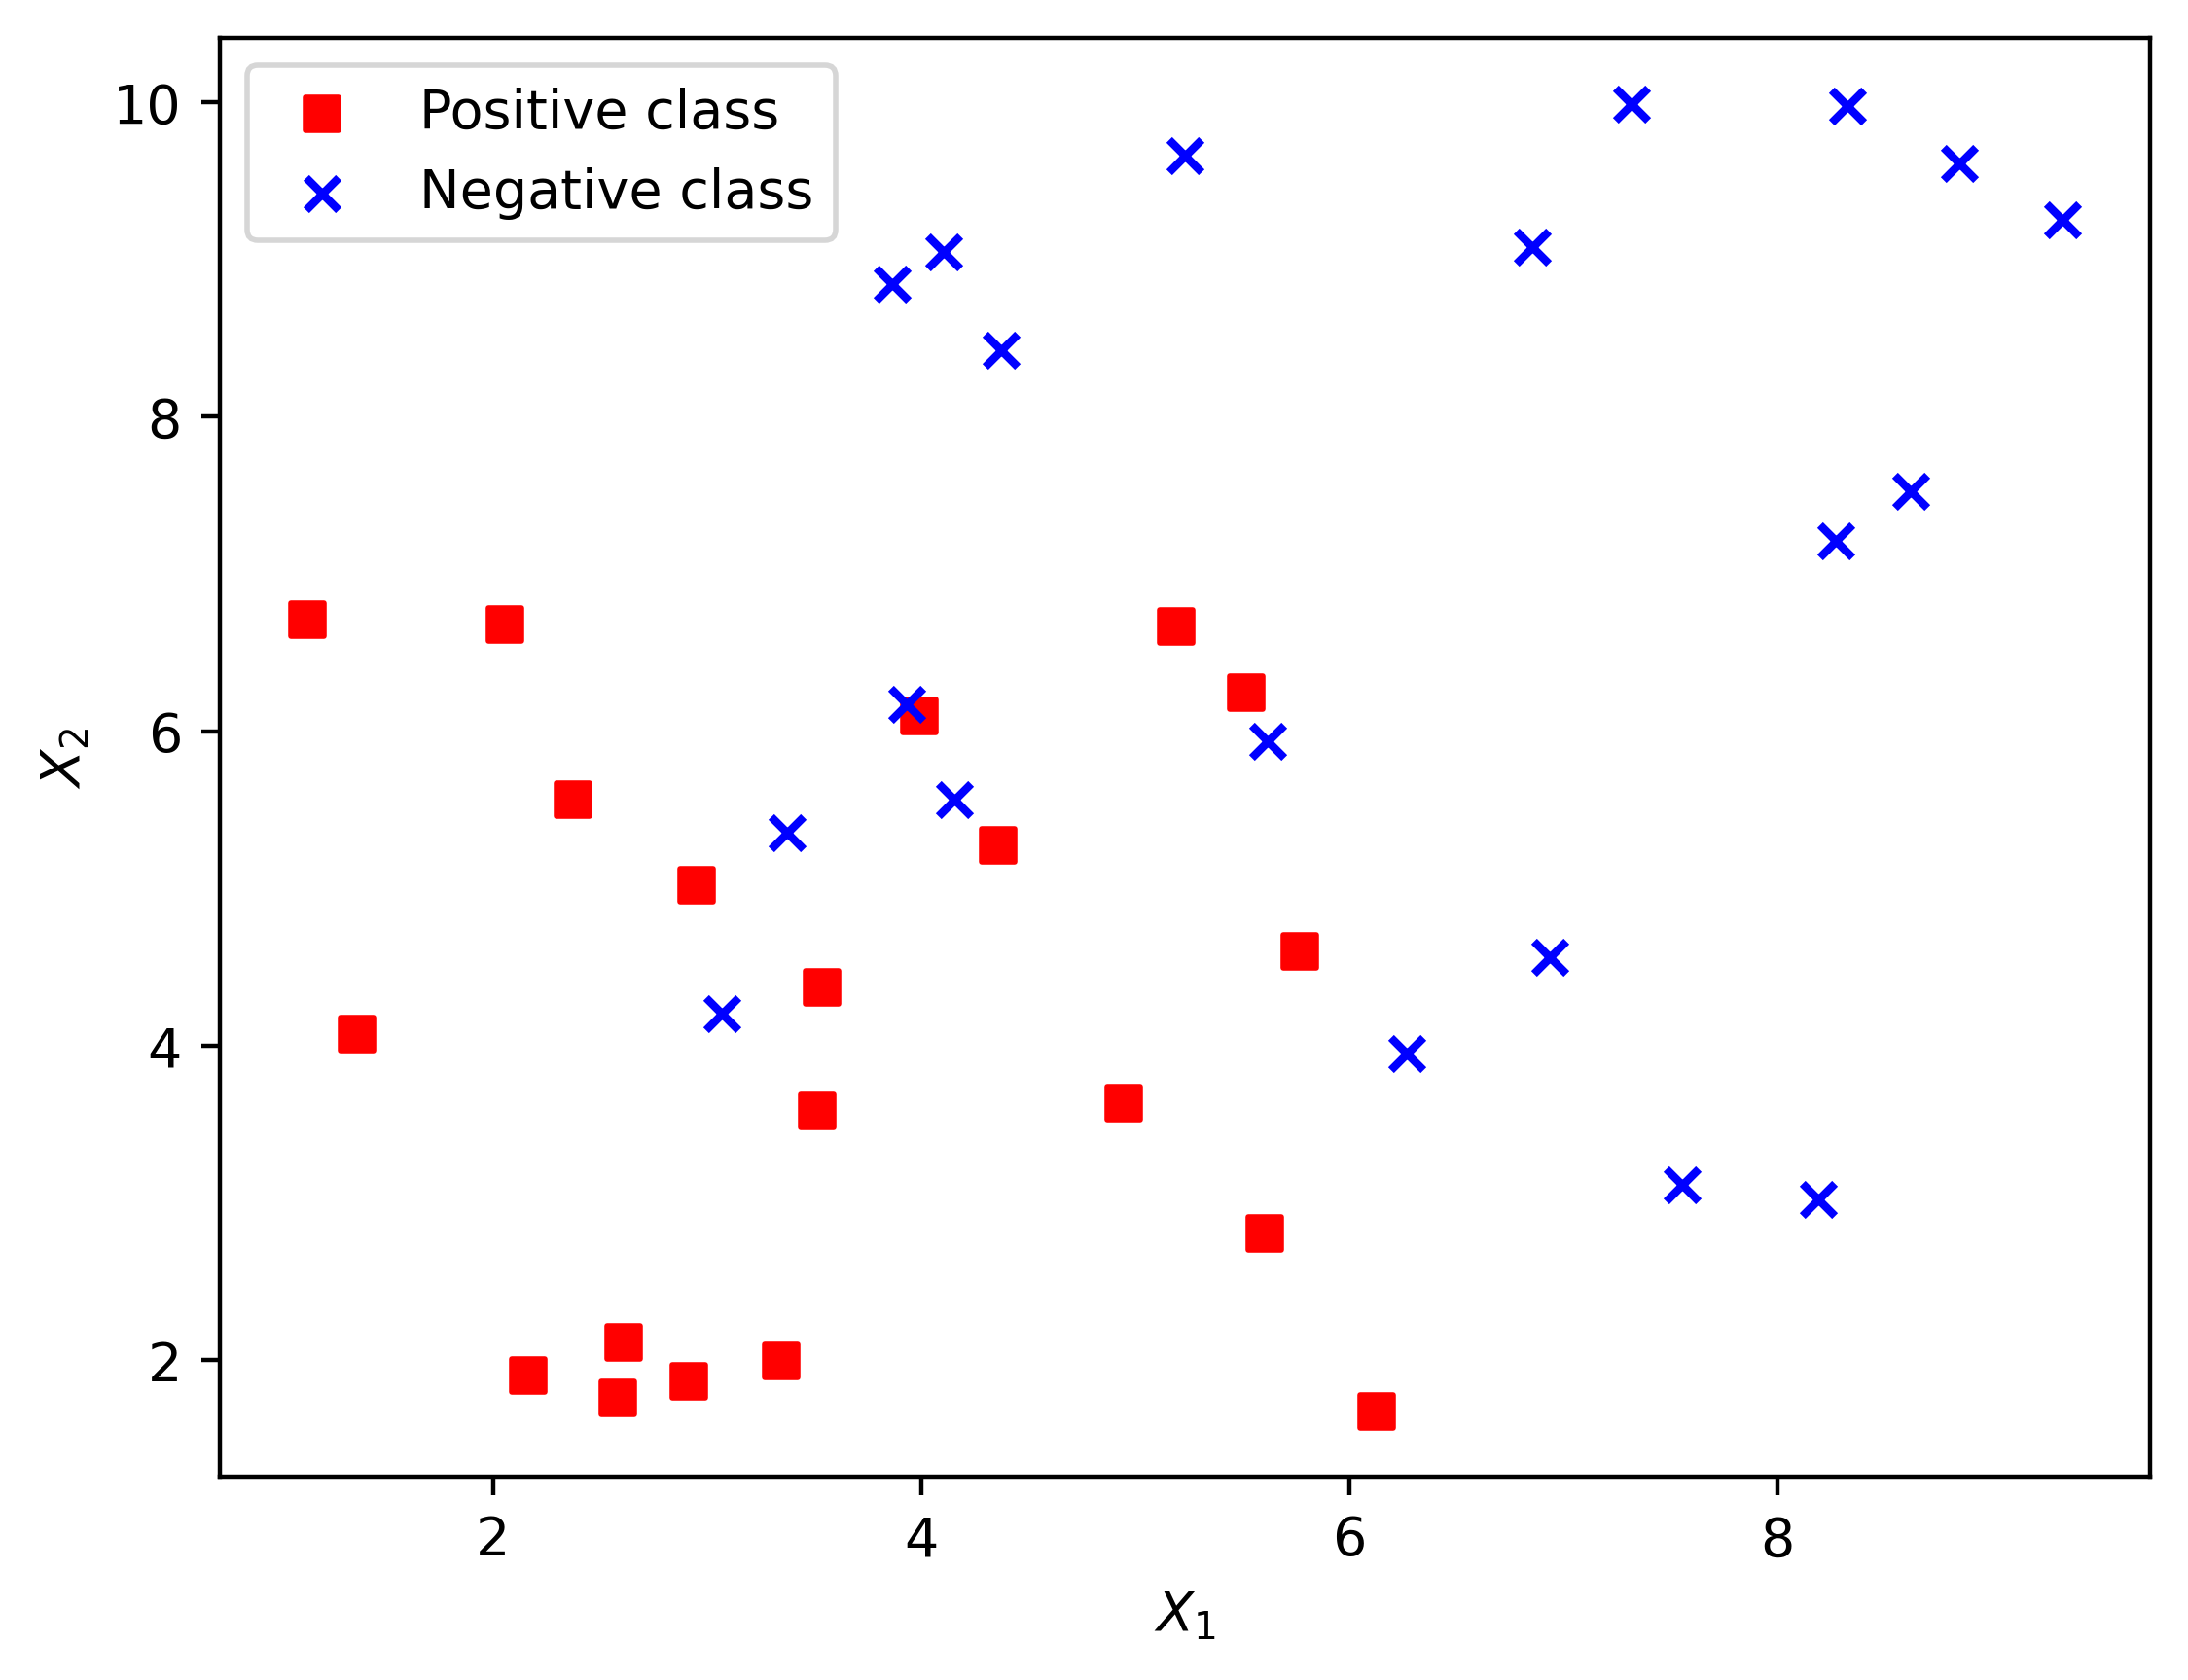

In [147]:
# Plotting the scatter plot for the positive and negative classes
plt.scatter(X_1_pos, X_2_pos, color = 'red', marker ='s')
plt.scatter(X_1_neg, X_2_neg, color = 'blue', marker = 'x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class'])

In [148]:
# Creating a 40x2 matrix
X = np.block([[X_1_pos, X_2_pos],[X_1_neg, X_2_neg]]
X.shape

(40, 2)

In [149]:
print(X[0:3])

[[1.36444539 4.0725691 ]
 [2.58275035 1.7600652 ]
 [1.13382431 6.70977681]]


In [133]:
# Creating a vstack(vertical stack) for response variable y
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
print(y[0:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [136]:
# Fitting the logistic regression model using scikit-learn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'liblinear')
model

LogisticRegression(solver='liblinear')

In [151]:
model.fit(X,y)

LogisticRegression(solver='liblinear')

In [153]:
y_predict = model.predict(X)

In [171]:
# Seperate the predictions(positive and negative) into indices
pos_indices =[counter for counter in range(len(y_predict)) if y_predict[counter] == 1]
neg_indices = [counter for counter in range(len(y_predict)) if y_predict[counter] == 0]
pos_indices

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 19, 25, 36]